# Python_Competitive_Programming_BFS

---

## BFS ( Breadth-First Search )

- 너비 우선 탐색


- 가까운 노드부터 우선적으로 탐색


- 큐 자료구조 이용


1. 탐색 시작 노드를 큐에 삽입하고, 방문 처리를 합니다.

2. 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드중에서, **방문하지 않은 노드를 모두 큐에 삽입하고 방문처리 합니다.**

3. 더 이상 2번의 과정을 수행할 수 없을 때 까지 반복합니다.



- 각 간선의 비용이 모두 동일한 상황에서 최단 거리 해결 목적으로도 사용

---

## BFS 동작 과정


1. 시작 노드 '1' 큐 삽입후 방문 처리,


2. 큐 에서 노드 '1' 을 꺼낸 후


3. `방문 하지 않은 인접 노드` 모두를 ('2','3','8') 큐에 삽입하고 방문 처리 합니다.


4. 노드 번호가 낮은순으로 먼저 삽입되므로, 큐 에서 노드 '2'를 꺼낸 후


5. 노드 '2' 에서 `방문 하지 않은 인접 노드` '7'를 큐에 삽입하고 방문 처리 합니다.


6. 큐 에서 노드 '3'을 꺼낸 후 


7. 노드 '3' 에서 `방문 하지 않은 인접 노드`  '4', '5' 를 모두 큐에 삽입하고 방문 처리 합니다.

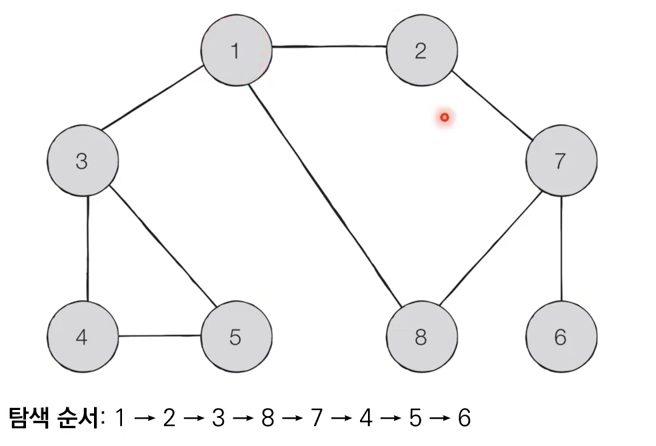

---

## Src - BFS

- `from collections import deque`


- 그래프를 표현하는데 2차원 리스트 사용


- 노드번호 1번부터 시작하므로, idx 0번 째 리스트 는 빈 리스트로 처리


- 그래프에는 1번 노드부터 인접한 노드가 무엇인지 명시



- 큐 자료 구조 활용 :방문처리 명시를 위해 아직 하나도 방문하지 않은 visted [False] 리스트를 생성



- BFS 함수 정의
    - 입력 :  그래프, 시작노드, 방문처리 리스트

---

In [1]:
# 큐(Queue) 구현을 위해 deque 라이브러리 사용
from collections import deque

# BFS 함수 정의
def bfs(graph, start, visited):
    
    # 현재 노드를 방문 처리
    queue = deque([start])  
    visited[start] = True 
    
    # 큐가 빌 때까지 반복
    while queue:
        
        # 큐에서 첫 번째 원소를 뽑아 출력
        v = queue.popleft()         
        print(v, end=' ')
        
        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True


                
# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)

graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 BFS 함수 호출
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

---

## <문제> 미로 탈출

N x M 크기의 직사각형 미로

- 현재 위치는 (1, 1), 미로의 출구는 (N, M)의 위치에 존재하며, 한 번에 한 칸씩 이동할 수 있습니다.


- 괴물이 있는 부분은 0, 괴물이 없는 부분은 1로 표시 
> 1인 부분으로만 이동 가능 == 방문처리


- 이때 동빈이가 탈출 하기 위해 움직여야 하는 최소 칸의 개수를 구하시오.


- 칸을 셀 때는 시작 칸과 마지막 칸을 모두 포함해서 계산합니다.



---

### 해결 아이디어 - 미로 탈출

- BFS는 시작 지점에서 가까운 노드부터 차례대로 그래프의 모든 노드를 탐색합니다.


- 상 하 좌우로 연결된 모든 노드로의 거리가 1로 동일합니다.
>따라서 (1, 1) 지점부터 BFS 를 수행하여, 모든 노드의 최단 거리 값을 기록하면, 해결 할 수 있습니다.
    
- (1,1) 위치에서 시작 

- (1,1) 좌표에서 상,하,좌 우로 탐색을 진행하면, 바로 옆 노드인 1,2 위치의 노드를 방문

- 새롭게 방문한 (1,2) 노드의 값을 +1 처리하여 2로 바꾸게 됩니다.
>노드 값 2 == 탈출 까지의 총 거리


  
- BFS 큐 로 구현

---

In [2]:

def bfs(x, y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x, y))
    
    # 큐가 빌 때까지 반복하기
    while queue:
        x, y = queue.popleft()
        
        # 현재 위치에서 4가지 방향으로의 위치 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            
            # 벽인 경우 무시
            if graph[nx][ny] == 0:
                continue
            
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
                
    # 가장 오른쪽 아래까지의 최단 거리 반환
    return graph[n - 1][m - 1]


from collections import deque

# N, M을 공백을 기준으로 구분하여 입력 받기
n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# 이동할 네 가지 방향 정의 (상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]


# BFS를 수행한 결과 출력
print(bfs(0, 0))

3 3
110
010
011
5
